In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
inflation_rate = 0.025 #
yearly_savings = 30000.
savings_interest = 0.02
calamity_size = 180000.

a_savings_goal = 100000.
a_cash_ratio = 0.0

b_savings_goal = 0.
b_cash_ratio = 0.0

In [115]:
df = pd.read_csv('stock_data_reduced.csv') # inflation adjusted
df = df.dropna()

In [116]:
df['a_cash'] = [0.00] * 19
df['b_cash'] = [0.00] * 19
df['a_stocks'] = [0.00] * 19
df['b_stocks'] = [0.00] * 19
df['a_wealth'] = [0.00] * 19
df['b_wealth'] = [0.00] * 19

In [117]:
for idx, row in df.iterrows():
    
    for player in ['a', 'b']:
        if player == 'a':
            savings_goal = a_savings_goal
            cash_ratio = a_cash_ratio
        else:
            savings_goal = b_savings_goal
            cash_ratio = b_cash_ratio
        
        calamity = idx == 8
        free_cash = yearly_savings

#         if player == 'b' and idx == 1:
#             import pdb
#             pdb.set_trace()
        
        if idx == 0:
            cash = 0
            stocks = 0
        else:
            cash = df['%s_cash' % player][idx - 1] * (1 - inflation_rate + savings_interest)
            stocks = df['%s_stocks' % player][idx - 1]
                
        if calamity:
            withdraw = calamity_size
            
            if cash > withdraw:
                cash -= withdraw
                withdraw = 0
            else:
                withdraw -= cash
                cash = 0
                
                if free_cash > withdraw:
                    free_cash -= withdraw
                    withdraw = 0
                else:
                    withdraw -= free_cash
                    free_cash = 0
                    
                    stocks -= (withdraw / df['Price'][idx])
                    withdraw = 0
            assert withdraw == 0
    
        if cash < savings_goal:
            diff = savings_goal - cash
            if diff > free_cash:
                cash += free_cash
                free_cash = 0
            else:
                free_cash = (free_cash + cash) - savings_goal
                cash = savings_goal

        save = free_cash * cash_ratio
        invest = free_cash - save

        cash += save
        stocks += invest / df['Price'][idx]
        df.loc[idx, '%s_cash' % player] = cash
        df.loc[idx, '%s_stocks' % player] = stocks
        df.loc[idx, '%s_wealth' % player] = cash + df['Price'][idx] * stocks
        

In [118]:
df

,Date,Price,a_cash,b_cash,a_stocks,b_stocks,a_wealth,b_wealth
0,1/1/01,1949.27,30000.00,0.0,0.000000,15.390377,30000.000000,30000.000000
1,1/1/02,1645.28,59850.00,0.0,0.000000,33.624355,59850.000000,55321.479323
2,1/1/03,1259.93,89550.75,0.0,0.000000,57.435202,89550.750000,72364.334000
3,1/1/04,1562.71,100000.00,0.0,12.224275,76.632622,119102.996250,119754.564448
4,1/1/05,1583.15,100000.00,0.0,30.858011,95.582184,148852.860424,151320.935238
5,1/1/06,1647.89,100000.00,0.0,48.759692,113.787283,180350.608069,187508.925856
6,1/1/07,1797.99,100000.00,0.0,65.166902,130.472582,217169.437767,234588.397041
7,1/1/08,1669.22,100000.00,0.0,82.839827,148.445048,238277.895822,247787.442705
8,1/1/09,1047.62,0.00,0.0,34.635325,5.263360,36284.659434,5514.000987
9,1/1/10,1325.08,30000.00,0.0,34.635325,27.903502,75894.576777,36974.372795


Text(0.5,1,'Strategy A (blue) vs Strategy B (orange) on S&P500 2001-2019 $75k boomtime calamity')

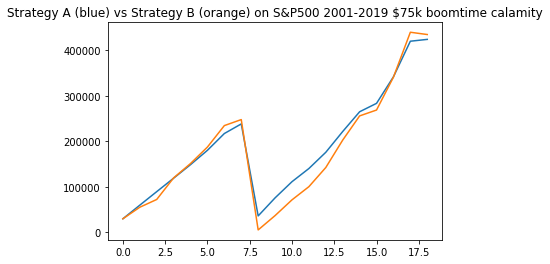

In [119]:
plt.plot(df.index, df['a_wealth'])
plt.plot(df.index, df['b_wealth'])
plt.title('Strategy A (blue) vs Strategy B (orange) on S&P500 2001-2019 $75k boomtime calamity')